In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()


In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [18]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [20]:
classes=["airplane","automobile","bird"," cat", "deer", "dog", "frog", "horse", "ship","truck"]

In [21]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,5))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

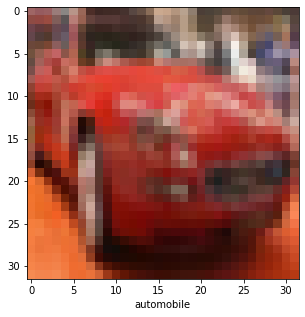

In [23]:
plot_sample(x_train,y_train,5)

In [24]:
x_train=x_train/255
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [25]:
x_test=x_test/255
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [29]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.8107 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.6226 - accuracy: 0.4296
Epoch 3/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5376 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4774 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.4301 - accuracy: 0.4949


In [30]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.5102 - accuracy: 0.4606


[1.5102055072784424, 0.46059998869895935]

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report:\n",classification_report(y_test,y_pred_classes))

classification report:
               precision    recall  f1-score   support

           0       0.61      0.50      0.55      1000
           1       0.62      0.57      0.59      1000
           2       0.35      0.37      0.36      1000
           3       0.42      0.15      0.22      1000
           4       0.62      0.13      0.21      1000
           5       0.36      0.45      0.40      1000
           6       0.51      0.60      0.55      1000
           7       0.35      0.76      0.48      1000
           8       0.79      0.40      0.53      1000
           9       0.45      0.68      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.44     10000
weighted avg       0.51      0.46      0.44     10000



In [36]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,activation='relu',kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [39]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [40]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4717 - accuracy: 0.4735
Epoch 2/10
1563/1563 [==============================] - 16s 11ms/step - loss: 1.1261 - accuracy: 0.6047
Epoch 3/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.9963 - accuracy: 0.6522
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9071 - accuracy: 0.6822
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8363 - accuracy: 0.7101
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7808 - accuracy: 0.7285
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7275 - accuracy: 0.7454
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6850 - accuracy: 0.7628
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6388 - accuracy: 0.7753
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [41]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9727 - accuracy: 0.6889


[0.9727393388748169, 0.6888999938964844]

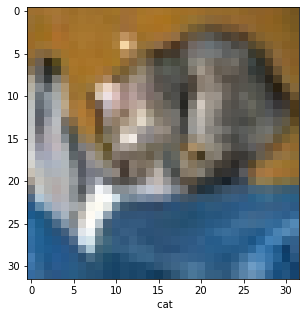

In [44]:
plot_sample(x_test,y_test,0)